In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, \
                        optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

In [2]:
b_size = 5
train_datagen = ImageDataGenerator(rescale=1./255, \
                                horizontal_flip=True,\
                        # 수평 대칭 이미지를 50% 확률로 만듬
                                 width_shift_range=0.1,\
                        # 전체 크기의 10% 범위에서 좌우로 이동
                                 height_shift_range=0.1,\
                                 fill_mode='nearest')

In [3]:
train_generator = train_datagen.flow_from_directory(
                            'train',
                            target_size=(150,150),
                            batch_size=b_size,
                            class_mode='binary')

Found 160 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                            'test',
                            target_size=(150,150),
                            batch_size=b_size,
                            class_mode='binary')

Found 120 images belonging to 2 classes.


In [5]:
transfer_model = VGG16(weights='imagenet', include_top=False,
                      input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [7]:
finetune_model = Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 15,239,170
Trainable params: 524,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
finetune_model.compile(loss='sparse_categorical_crossentropy', \
                      optimizer=optimizers.Adam(\
                        learning_rate=0.0002), metrics=['accuracy'])


steps_train = len(train_generator)
steps_test = len(test_generator)

history = finetune_model.fit(
       train_generator,
       steps_per_epoch=steps_train,
       epochs=20,
       validation_data=test_generator,
       validation_steps=steps_test )

Epoch 1/20
32/32 [==============================] - 16s 494ms/step - loss: 0.5566 - accuracy: 0.7063 - val_loss: 0.4218 - val_accuracy: 0.8333
Epoch 2/20
32/32 [==============================] - 15s 474ms/step - loss: 0.3641 - accuracy: 0.8500 - val_loss: 0.2794 - val_accuracy: 0.9250
Epoch 3/20
32/32 [==============================] - 15s 459ms/step - loss: 0.2480 - accuracy: 0.9312 - val_loss: 0.3142 - val_accuracy: 0.8583
Epoch 4/20
32/32 [==============================] - 14s 453ms/step - loss: 0.2124 - accuracy: 0.9375 - val_loss: 0.1937 - val_accuracy: 0.9333
Epoch 5/20
32/32 [==============================] - 14s 453ms/step - loss: 0.1582 - accuracy: 0.9688 - val_loss: 0.1651 - val_accuracy: 0.9583
Epoch 6/20
32/32 [==============================] - 14s 455ms/step - loss: 0.1491 - accuracy: 0.9438 - val_loss: 0.1895 - val_accuracy: 0.9250
Epoch 7/20
32/32 [==============================] - 14s 454ms/step - loss: 0.1466 - accuracy: 0.9563 - val_loss: 0.1390 - val_accuracy: 0.9667

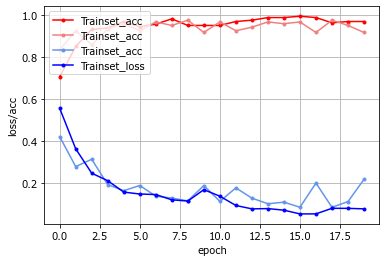

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', \
         label='Trainset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', \
         label='Trainset_acc')
plt.plot(x_len, y_loss, marker='.', c='blue', \
         label='Trainset_loss')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()